In [123]:
import pandas as pd
from pandas import DataFrame
import  seaborn as sns
import matplotlib.pyplot as plt



# Context of the Dataset
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This dataset aims to classify stars, galaxies, and quasars based on their spectral characteristics.

# Load Data

In [124]:
path: str = r"D:\Documents\GitHub\UNI_Stellar_Classification\Data\star_classification.csv"
data: DataFrame = pd.read_csv(path)
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Feature Description
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

IDs and Metadata:
- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)


Descriptive Features of the Observation:
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS which defines a unique part of the observed sky

Target:
- class = object class (galaxy, star or quasar object)

In [141]:
feature_columns: list = ["u", "g", "r", "i", "z", "redshift", "class", "plate"]
feature_data: DataFrame = data[feature_columns]
feature_data.head()

,alpha,delta,u,g,r,i,z,redshift,class,plate
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,5812
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,10445
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,4576
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,9149
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY,6121


## check for missing values

In [126]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   redshift  100000 non-null  float64
 8   class     100000 non-null  object 
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


Fortunately, this dataset contains no feature with missing data!
this means there is no need for imputation techniques such as mean, median, or regression imputation.

<Axes: xlabel='class', ylabel='Count'>

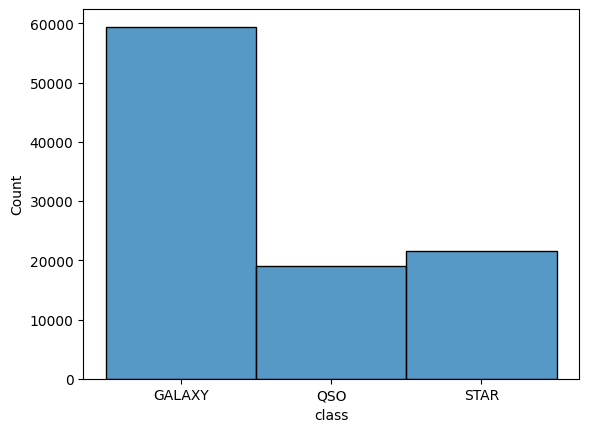

In [127]:
sns.histplot(feature_data["class"])

<Axes: xlabel='plate', ylabel='Count'>

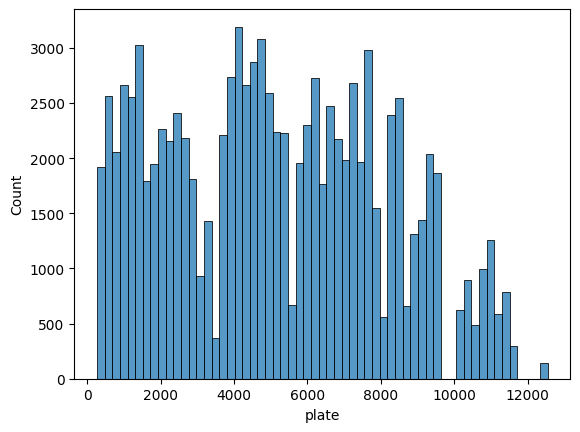

In [142]:
sns.histplot(feature_data.plate)

In [128]:
print(f"Absolute Number of Galaxy:  {len(feature_data[feature_data['class'] == 'GALAXY']):<15} Relative Share {len(feature_data[feature_data['class'] == 'GALAXY'])/ len(feature_data):2%}")
print(f"Absolute Number of Quasar:  {len(feature_data[feature_data['class'] == 'QSO']):<15} Relative Share {len(feature_data[feature_data['class'] == 'QSO'])/ len(feature_data):2%}")
print(f"Absolute Number of Star:    {len(feature_data[feature_data['class'] == 'STAR']):<15} Relative Share {len(feature_data[feature_data['class'] == 'STAR'])/ len(feature_data):2%}")

Absolute Number of Galaxy:  59445           Relative Share 59.445000%
Absolute Number of Quasar:  18961           Relative Share 18.961000%
Absolute Number of Star:    21594           Relative Share 21.594000%


It becomes visible, that there is an imbalance in the data. Almost 60% of all observations are Galaxies, while only 20% are either Quasars or Stars.
This knowledge can be used to treat the data while preprocessing and training to avoid issues due to this imbalance.

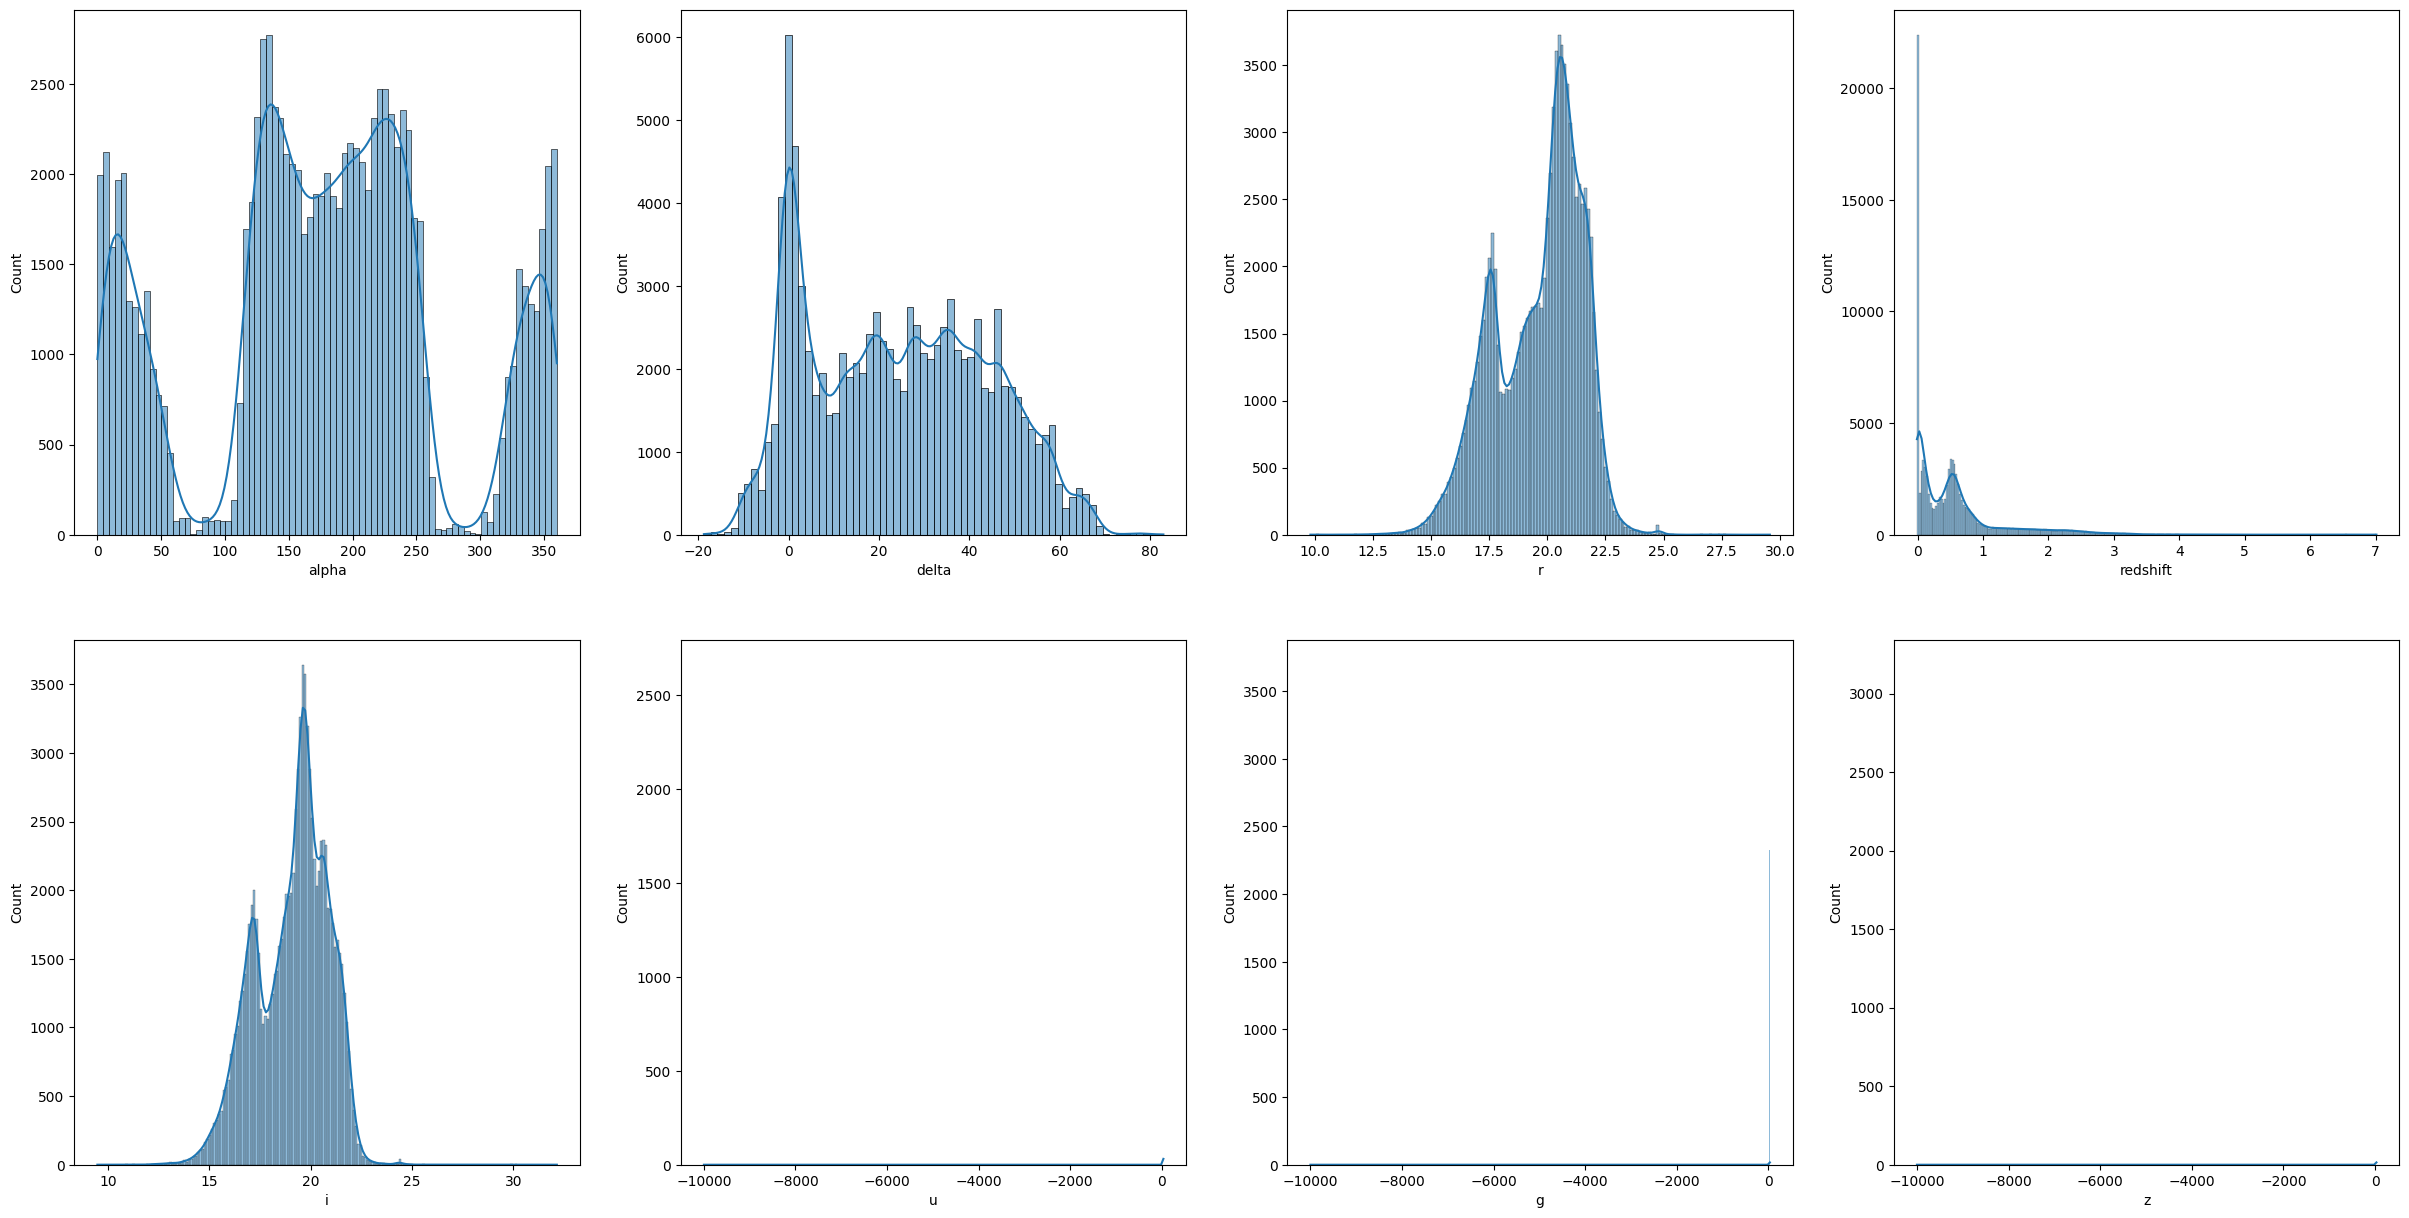

In [96]:
features_for_hist = ["alpha", "delta", "r", "redshift", "i", "u", "g", "z"]
fig, axes = plt.subplots(2, int(len(features_for_hist)/2), figsize=(30,15))
for row in range(2):
    for col in range(int(len(features_for_hist)/2)):
        sns.histplot(feature_data[features_for_hist[(row * int(len(features_for_hist)/2)) + col]], ax=axes[row, col], kde=True)

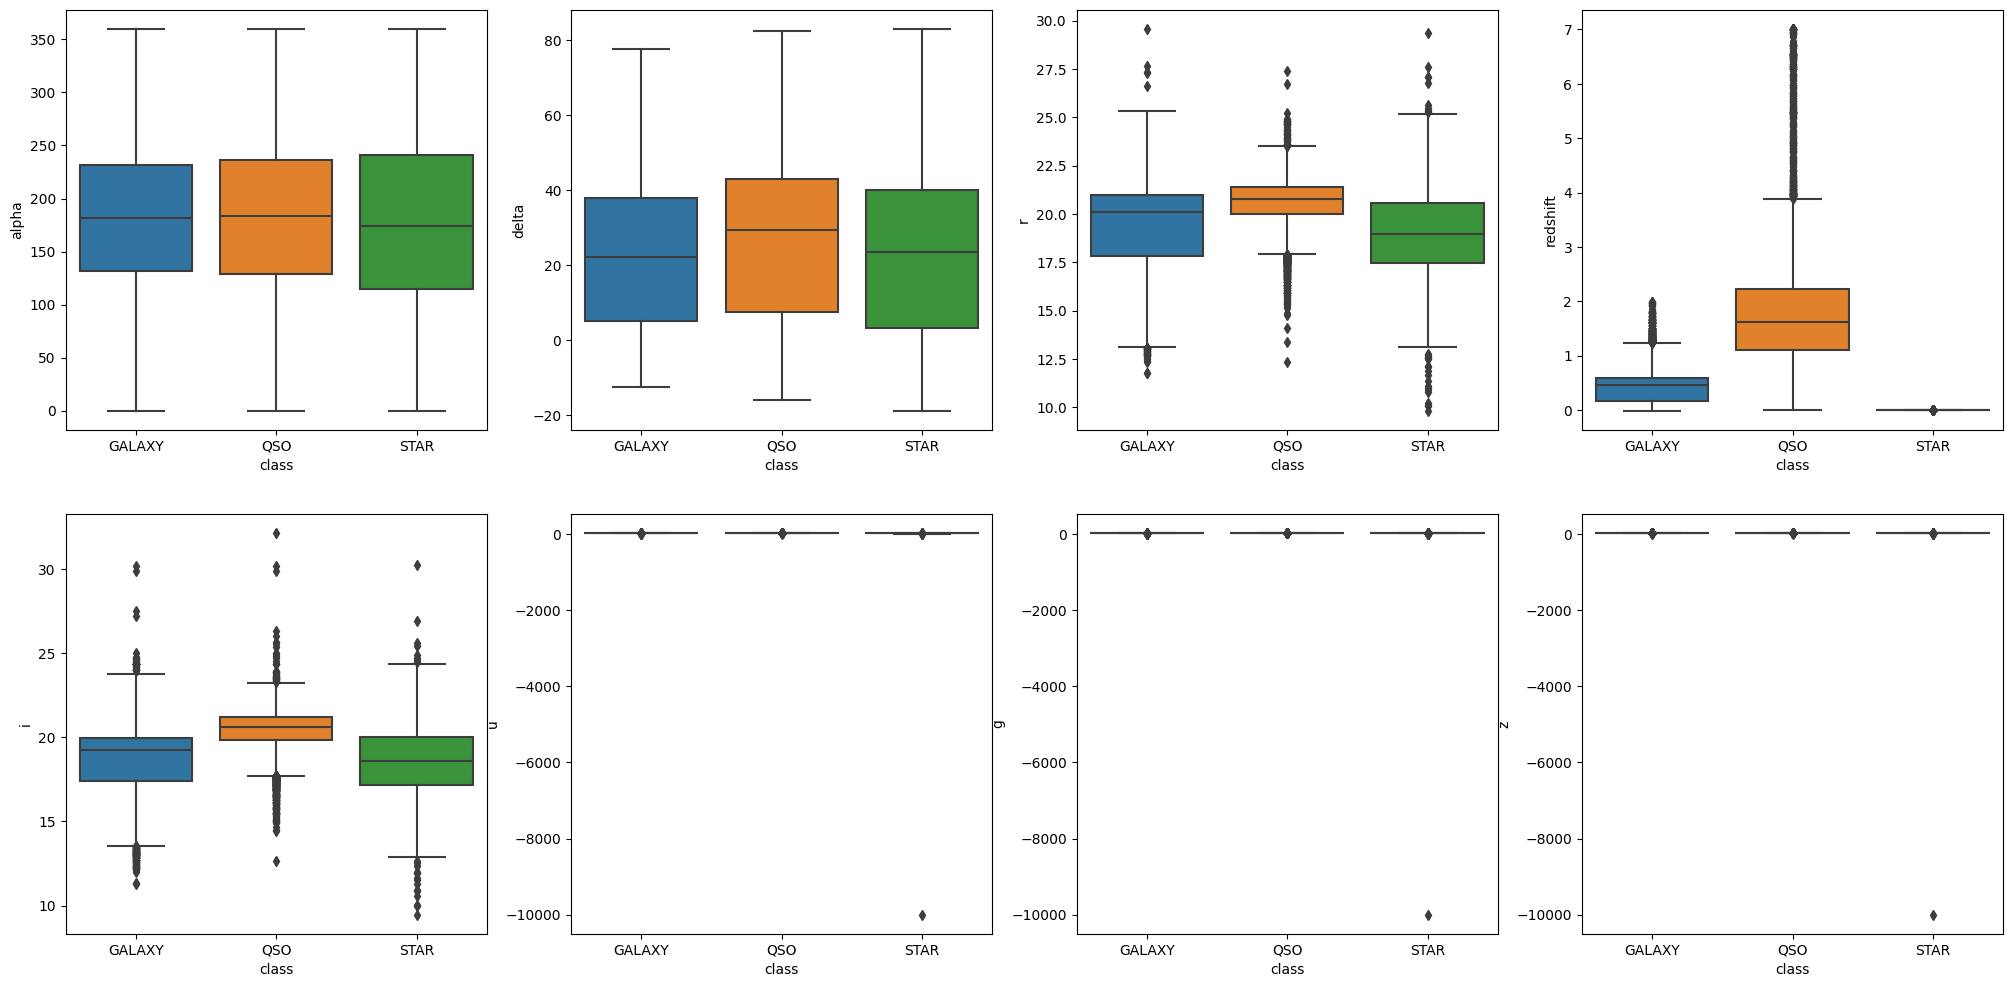

In [100]:
features_for_box = ["alpha", "delta", "r", "redshift", "i", "u", "g", "z"]
fig, axes = plt.subplots(2, int(len(features_for_box)/2), figsize=(25, 12))
for row in range(2):
    for col in range(int(len(features_for_box)/2)):
        sns.boxplot(data=feature_data, x="class", y=features_for_hist[(row * int(len(features_for_hist)/2)) + col], ax=axes[row, col])

In [129]:
feature_data[["u", "g", "z"]].describe()

,u,g,z
count,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,18.668810
std,31.769291,31.750292,31.728152
min,-9999.000000,-9999.000000,-9999.000000
25%,20.352353,18.965230,17.460677
50%,22.179135,21.099835,19.004595
75%,23.687440,22.123767,19.921120
max,32.781390,31.602240,29.383740


In [130]:
print(f"Idx min g: {feature_data.g.idxmin()}\nIdx min u: {feature_data.u.idxmin()}\nIdx min z: {feature_data.z.idxmin()}")

Idx min g: 79543
Idx min u: 79543
Idx min z: 79543


In [131]:
feature_data.iloc[[feature_data.g.idxmin()]][["u", "g", "z"]]

,u,g,z
79543,-9999.0,-9999.0,-9999.0


In [132]:
print(f"Occurrence of negative values:\nnumber negative values in g: {len(feature_data[feature_data.g < 0])}\nnumber negative values in u: {len(feature_data[feature_data.u < 0])}\nnumber negative values in z: {len(feature_data[feature_data.z < 0])}")

Occurrence of negative values:
number negative values in g: 1
number negative values in u: 1
number negative values in z: 1


it seems that for the features u, g, and z, the row with index 79543 causes some trouble, since the value of -9999.0 seems to be far off the normal range of those features.The boxplot also show that for those three features, there is one outlier far off the others.
It is reasonable to drop this one row completely.
Of course the class STAR is underrepresented but in the context of astronomy and photometric system since Ultraviolet filter (feature u), Green filter (feature g) and Infrared filter (z) quantify the amount of light in the specific spectrum.
Thus negative numbers do not make sense. Also, among all observations -9999 is the only negative value in all the observations which supports the concern that this value does not provide meaningful information

In [143]:
clean_data: DataFrame = feature_data.drop(index=feature_data.g.idxmin())
clean_data[["u", "g", "z"]].describe()

,u,g,z
count,99999.000000,99999.000000,99999.000000
mean,22.080679,20.631583,18.768988
std,2.251068,2.037384,1.765982
min,10.996230,10.498200,9.612333
25%,20.352410,18.965240,17.460830
50%,22.179140,21.099930,19.004600
75%,23.687480,22.123775,19.921120
max,32.781390,31.602240,29.383740


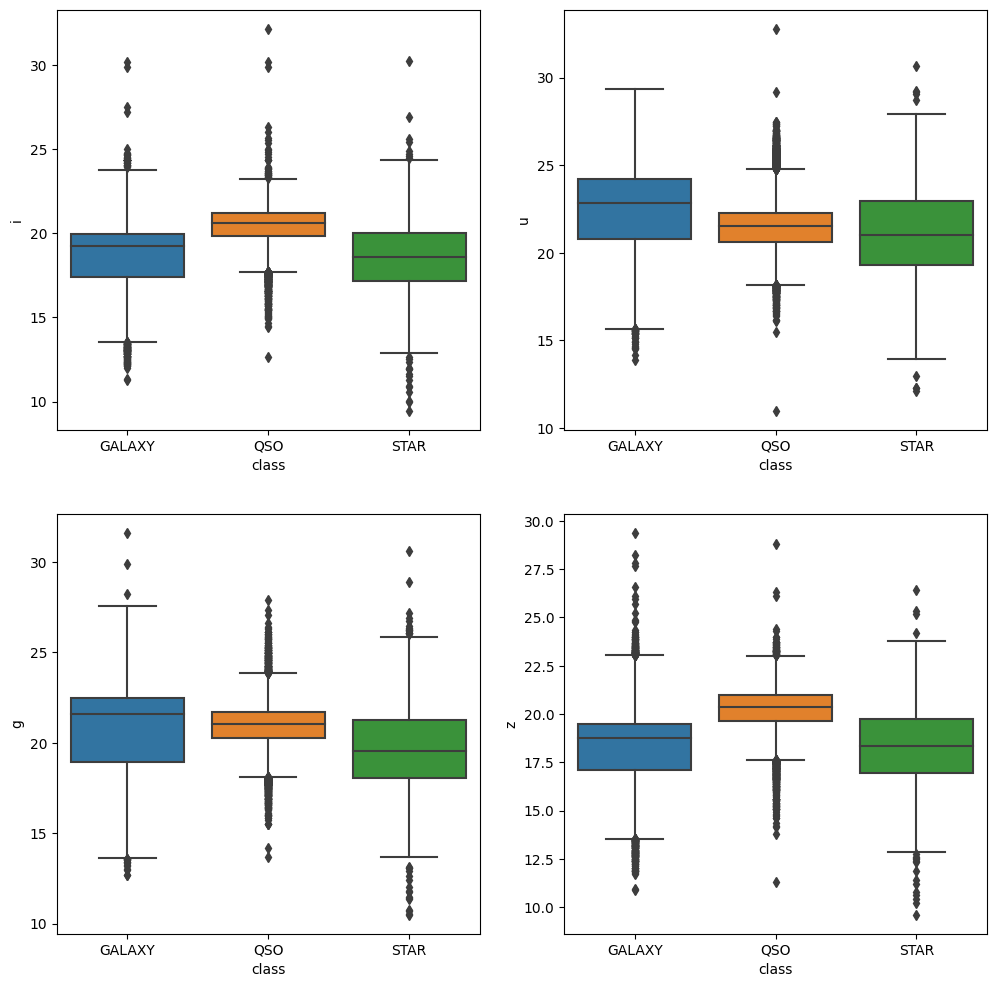

In [107]:
features_for_hist = ["i", "u", "g", "z"]
fig, axes = plt.subplots(2, int(len(features_for_box)/2), figsize=(12, 12))
for row in range(2):
    for col in range(int(len(features_for_box)/2)):
        sns.boxplot(data=clean_data, x="class", y=features_for_hist[(row * int(len(features_for_hist)/2)) + col], ax=axes[row, col])

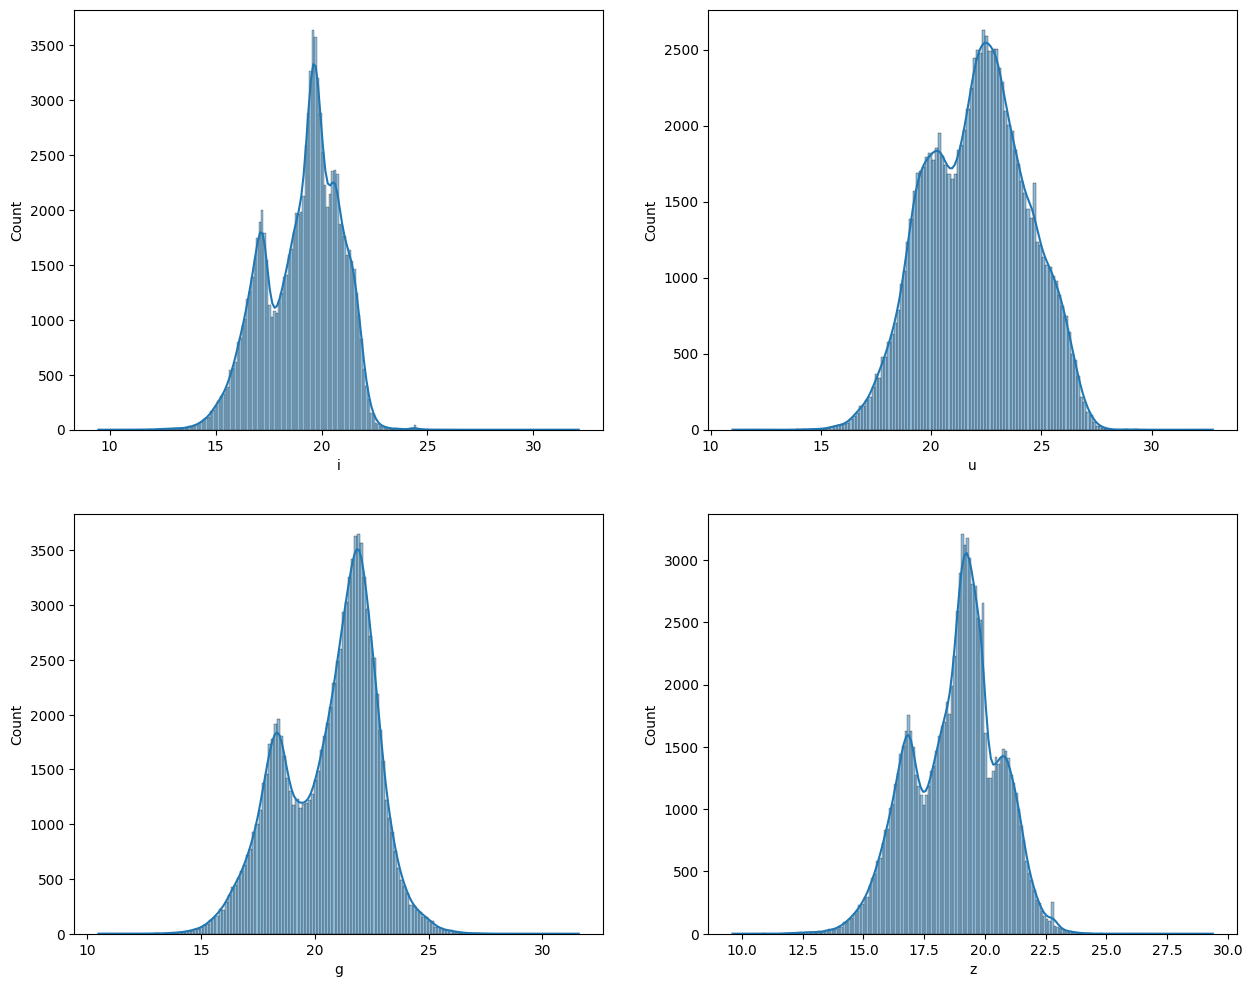

In [110]:
features_for_hist = ["i", "u", "g", "z"]
fig, axes = plt.subplots(2, int(len(features_for_hist)/2), figsize=(15,12))
for row in range(2):
    for col in range(int(len(features_for_hist)/2)):
        sns.histplot(clean_data[features_for_hist[(row * int(len(features_for_hist)/2)) + col]], ax=axes[row, col], kde=True)

All the distributions look not too skewed. However, they seem to be mostly multy modal with 2 or 3 peaks. This does make sense considering that there are three distinct classes.
Of course this is just an indication and must not mean that each of the peaks represent a different class.

In [116]:
data_stars: DataFrame = clean_data[clean_data["class"] == "STAR"]
data_quasar: DataFrame = clean_data[clean_data["class"] == "QSO"]
data_galaxy: DataFrame = clean_data[clean_data["class"] == "GALAXY"]

<Axes: xlabel='alpha', ylabel='Count'>

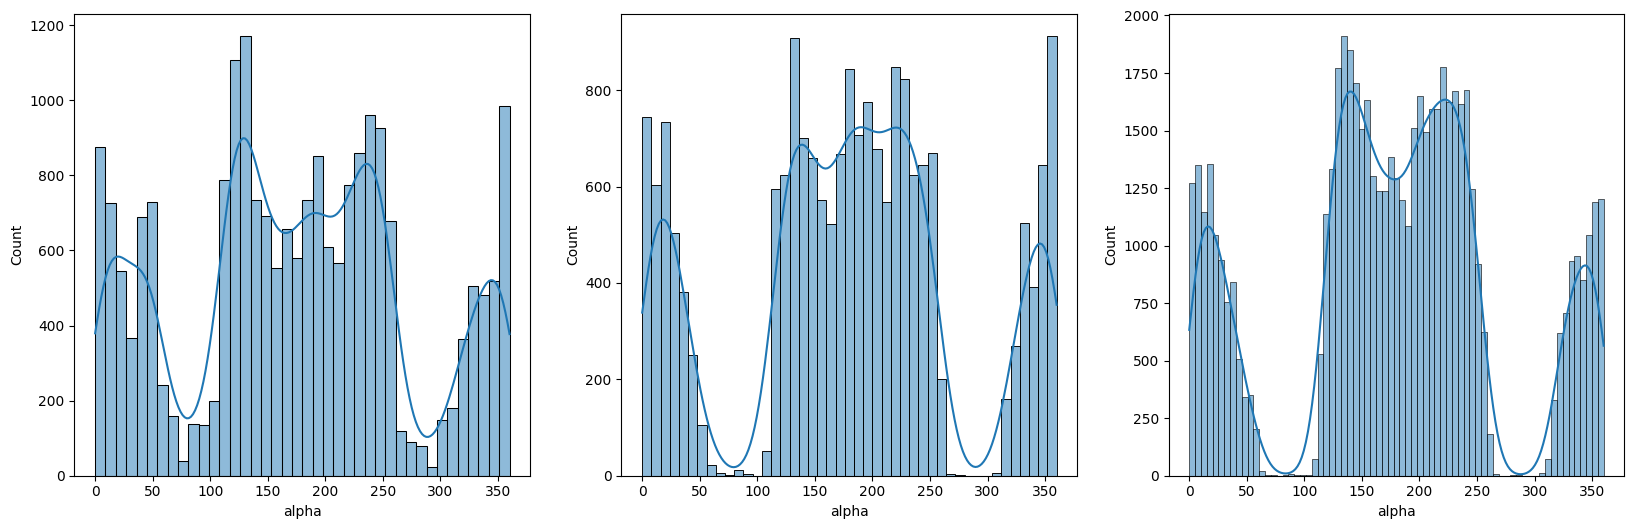

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data_stars["alpha"], kde=True, ax=axes[0])
sns.histplot(data_quasar["alpha"], kde=True,ax=axes[1])
sns.histplot(data_galaxy["alpha"], kde=True, ax=axes[2])

The feature alpha is a perfect example all three of the classes are similarly distributed with a multy modal density and not each class with a uni-modal distribution.

In [144]:
## Save The Data and reindex it
save_path: str = r"D:\Documents\GitHub\UNI_Stellar_Classification\Data\star_classification_only_features.csv"
clean_data.reset_index(inplace=True)
clean_data.to_csv(save_path)

In [145]:
clean_data.to_csv(save_path)

In [146]:
clean_data.head()

,index,alpha,delta,u,g,r,i,z,redshift,class,plate
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,5812
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,10445
2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,4576
3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,9149
4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY,6121
